In [ ]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz

--2019-10-18 06:29:24--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.70
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M   103MB/s    in 0.2s    

2019-10-18 06:29:30 (103 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]



In [ ]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Train data shape: ', trainX.shape)
print('Train labels shape: ', trainY.shape)
print('Test data shape: ', testX.shape)
print('Test labels shape: ', testY.shape)

Train data shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


In [ ]:
import os
import cv2
import numpy as np

train_image = 'train-images-idx3-ubyte'
train_label = 'train-labels-idx1-ubyte'
test_image = 't10k-images-idx3-ubyte'
test_label = 't10k-labels-idx1-ubyte'

for f in [train_image, train_label, test_image, test_label]:
	os.system('wget --no-check-certificate http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/%s.gz' % (f,))
	
for f in [train_image, train_label, test_image, test_label]:
	os.system('gunzip %s.gz' % (f,))

for image_f, label_f in [(train_image, train_label), (test_image, test_label)]:
    with open(image_f, 'rb') as f:
        images = f.read()
    with open(label_f, 'rb') as f:
        labels = f.read()
        
    images = [d for d in images[16:]]
    images = np.array(images, dtype=np.uint8)
    images = images.reshape((-1,28,28))
    
    ground_truths = labels[8:]
	
    outdir = image_f + "_folder"
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    for k,image in enumerate(images):
        # image directory
        img_directory = os.path.join(outdir, str(ground_truths[k]))

        # create folder if not existed
        if not os.path.exists(img_directory):
            os.makedirs(img_directory)

        cv2.imwrite(os.path.join(outdir, str(ground_truths[k]), '%05d.png' % (k,)), image)

    labels = [outdir + '/%05d.png %d' % (k, l) for k,l in enumerate(labels[8:])]
    with open('%s.txt' % label_f, 'w') as f:
        f.write(os.linesep.join(labels))

In [ ]:
ground_truths = labels[8:]
print(len(ground_truths))
print(len(images))

In [ ]:
ls -l

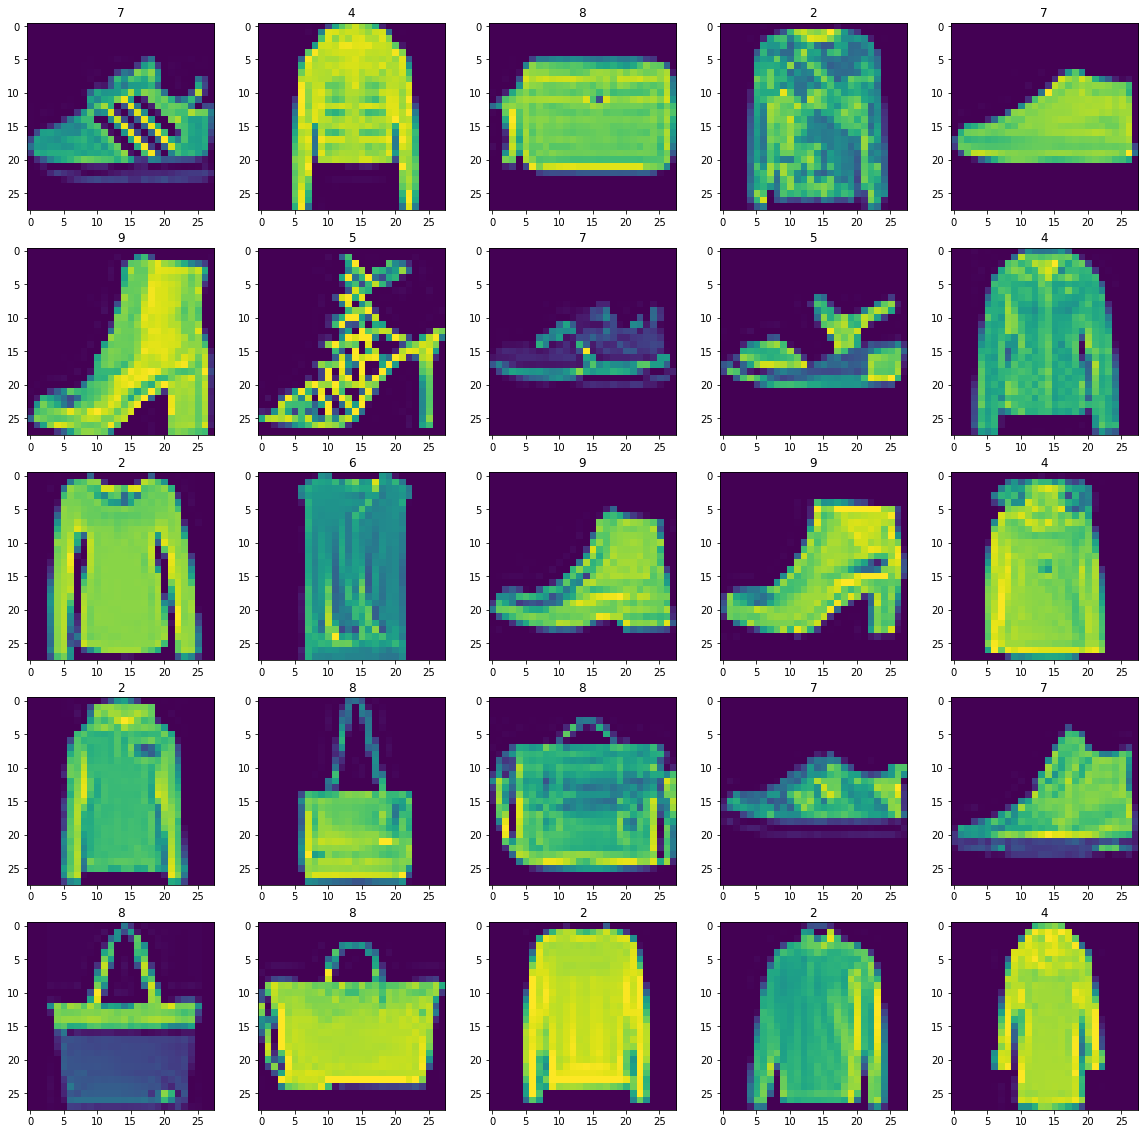

In [ ]:
#Images/n02105855-Shetland_sheepdog/n02105855_9415.jpg

import glob
import os

import numpy as np
from matplotlib.image import imread
%matplotlib inline
import matplotlib.pyplot as plt

# get image parts
def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename
    
    
sample_images = list(glob.glob(os.path.join('train-images-idx3-ubyte_folder/', '*/*'), recursive=True))
np.random.seed(42)
rand_imgs = np.random.choice(sample_images, size=5*5)
fig, axarr = plt.subplots(5, 5, figsize=(20, 20))

for i, rand_img in enumerate(rand_imgs):
    train_or_test, classname, filename_no_ext, filename = get_image_parts(rand_img)
    
    j = i // 5
    k = i % 5
    axarr[j][k].imshow(imread(rand_img))
    axarr[j][k].title.set_text(classname)
    axarr[j][k].grid(False)

In [ ]:
%rm -r train-images-idx3-ubyte_folder/
%rm -r t10k-images-idx3-ubyte_folder/

In [ ]:
from IPython.display import Image 
Image(filename='52493.png')

In [ ]:
cd train-images-idx3-ubyte_folder/

In [ ]:
import os
import numpy as np
import struct
import scipy.io as sio
import matplotlib.pyplot as plt


def save_svhn():
    dir_name = "./svhn_dataset"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    print "Loading matlab data of SVHN"
    mat = sio.loadmat("train_32x32.mat")
    data = mat['X']
    for i in range(data.shape[3]):
        plt.figure()
        if not os.path.isfile(os.path.join(dir_name, "%05d.png" % i)):
            plt.imsave(os.path.join(dir_name, "%05d.png" % i), data[..., i])
        plt.close()
        # break
    print "Program done!"


def save_mnist():
    print "Saving images from MNIST"
    dir_name = "./mnist_dataset"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    with open("./train-images.idx3-ubyte", "rb") as f:
        buf = f.read()
    img_idx = 0
    img_idx += struct.calcsize(">IIII")
    for i in range(60000):
        temp = struct.unpack_from(">784B", buf, img_idx)
        img = np.reshape(temp, (28, 28))
        plt.figure()
        plt.imsave(os.path.join(dir_name, "%05d.png" % i), img, cmap="gray")
        plt.close()
        img_idx += struct.calcsize(">784B")
    print "Program done!"


def main():
    # save_mnist()
    save_svhn()


if __name__ == '__main__':
    main()

In [ ]:
ls -l

In [ ]:
mv svhn_dataset svhn_train

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

In [ ]:
import os
import numpy as np
import struct
import scipy.io as sio
import matplotlib.pyplot as plt


def save_svhn():
    dir_name = "./svhn_test"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    print "Loading matlab test data of SVHN"
    mat = sio.loadmat("test_32x32.mat")
    data = mat['X']
    for i in range(data.shape[3]):
        plt.figure()
        if not os.path.isfile(os.path.join(dir_name, "%05d.png" % i)):
            plt.imsave(os.path.join(dir_name, "%05d.png" % i), data[..., i])
        plt.close()
        # break
    print "Program done!"

def main():
    # save_mnist()
    save_svhn()


if __name__ == '__main__':
    main()

In [ ]:
from PIL import Image
import numpy

def convert_img_square(im_pth='', dest_path='', desired_size=224):
#     print(im_pth)
    
    im = Image.open(im_pth)
    old_size = im.size  # (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

#     new_im = im.resize(new_size, Image.ANTIALIAS)
    new_im = im.resize(new_size)
    
    new_im = new_im.convert('RGB')
    
    new_im.save(dest_path)

    return True
    
# path = 'train/0/twinjet_s_001442.png'
# dest_path = 't1/test4.jpg'

# orig_arr = convert_img_square(path, dest_path, 499)   

# #convert to RGB and Save
# # orig_arr = orig_arr.convert('RGB')
# # orig_arr.save('t1/test2.jpg')

# from IPython.display import Image 
# Image(filename='t1/test4.jpg')

In [ ]:
path = 'svhn_train/73256.png'
dest_path = 'test4.jpg'

orig_arr = convert_img_square(path, dest_path, 499)   

from IPython.display import Image 
Image(filename='test4.jpg')

In [ ]:
####=======================
import glob
import os
import shutil
import random

#move class folder from classname_# to classname/#

def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename

move_folders = ['train-images-idx3-ubyte_folder']
dest_folder = 'fashion_mnist_train_resized_299'
data_file = []

# look for all images in sub-folders
for folder in move_folders:
    class_folders = glob.glob(os.path.join(folder, '*'))
    print('folder %s' %class_folders)
    
#     for sub_folder in class_folders:
#         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
#         print('sub folder %s' %sub_class_folders)
        
    for iid_class in class_folders:
        print(iid_class)
        
        class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
#         #Determize Set# (No Suffle)
        set = len(class_files)
        inner = range(0*set, 1*set) #all

        print('moving %d files' %(len(inner)))

#         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
#         for idx in range(len(random_list)):

        for idx in range(len(inner)):
            src = class_files[inner[idx]]

            train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
            dst = os.path.join(dest_folder, classname, filename)

            # image directory
            img_directory = os.path.join(dest_folder, classname)

            # create folder if not existed
            if not os.path.exists(img_directory):
                os.makedirs(img_directory)
                
            # convert image
            convert_img_square(src, dst, 299)
#             #moving file
#             shutil.move(src, dst)
# #                 shutil.copy(src, dst)


folder ['train-images-idx3-ubyte_folder/2', 'train-images-idx3-ubyte_folder/7', 'train-images-idx3-ubyte_folder/3', 'train-images-idx3-ubyte_folder/9', 'train-images-idx3-ubyte_folder/5', 'train-images-idx3-ubyte_folder/4', 'train-images-idx3-ubyte_folder/0', 'train-images-idx3-ubyte_folder/8', 'train-images-idx3-ubyte_folder/6', 'train-images-idx3-ubyte_folder/1']
train-images-idx3-ubyte_folder/2
moving 6000 files
train-images-idx3-ubyte_folder/7
moving 6000 files
train-images-idx3-ubyte_folder/3
moving 6000 files
train-images-idx3-ubyte_folder/9
moving 6000 files
train-images-idx3-ubyte_folder/5
moving 6000 files
train-images-idx3-ubyte_folder/4
moving 6000 files
train-images-idx3-ubyte_folder/0
moving 6000 files
train-images-idx3-ubyte_folder/8
moving 6000 files
train-images-idx3-ubyte_folder/6
moving 6000 files
train-images-idx3-ubyte_folder/1
moving 6000 files


In [ ]:
ls -l

In [ ]:
####=======================
import glob
import os
import shutil
import random

#move class folder from classname_# to classname/#

def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename

move_folders = ['t10k-images-idx3-ubyte_folder']
dest_folder = 'fashion_mnist_test_resized_299'
data_file = []

# look for all images in sub-folders
for folder in move_folders:
    class_folders = glob.glob(os.path.join(folder, '*'))
    print('folder %s' %class_folders)
    
#     for sub_folder in class_folders:
#         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
#         print('sub folder %s' %sub_class_folders)
        
    for iid_class in class_folders:
        print(iid_class)
        
        class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
#         #Determize Set# (No Suffle)
        set = len(class_files)
        inner = range(0*set, 1*set) #all

        print('moving %d files' %(len(inner)))

#         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
#         for idx in range(len(random_list)):

        for idx in range(len(inner)):
            src = class_files[inner[idx]]

            train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
            dst = os.path.join(dest_folder, classname, filename)

            # image directory
            img_directory = os.path.join(dest_folder, classname)

            # create folder if not existed
            if not os.path.exists(img_directory):
                os.makedirs(img_directory)
                
            # convert image
            convert_img_square(src, dst, 299)
#             #moving file
#             shutil.move(src, dst)
# #                 shutil.copy(src, dst)


folder ['t10k-images-idx3-ubyte_folder/2', 't10k-images-idx3-ubyte_folder/7', 't10k-images-idx3-ubyte_folder/3', 't10k-images-idx3-ubyte_folder/9', 't10k-images-idx3-ubyte_folder/5', 't10k-images-idx3-ubyte_folder/4', 't10k-images-idx3-ubyte_folder/0', 't10k-images-idx3-ubyte_folder/8', 't10k-images-idx3-ubyte_folder/6', 't10k-images-idx3-ubyte_folder/1']
t10k-images-idx3-ubyte_folder/2
moving 1000 files
t10k-images-idx3-ubyte_folder/7
moving 1000 files
t10k-images-idx3-ubyte_folder/3
moving 1000 files
t10k-images-idx3-ubyte_folder/9
moving 1000 files
t10k-images-idx3-ubyte_folder/5
moving 1000 files
t10k-images-idx3-ubyte_folder/4
moving 1000 files
t10k-images-idx3-ubyte_folder/0
moving 1000 files
t10k-images-idx3-ubyte_folder/8
moving 1000 files
t10k-images-idx3-ubyte_folder/6
moving 1000 files
t10k-images-idx3-ubyte_folder/1
moving 1000 files


In [ ]:
rm -r svhn_test/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

KeyboardInterrupt: ignored

In [ ]:
ls -l

In [ ]:
# !zip -r fashion_mnist_train_resized_299.zip fashion_mnist_train_resized_299
# !zip -r fashion_mnist_test_resized_299.zip fashion_mnist_test_resized_299

In [ ]:
# %cp fashion_mnist_train_resized_299.zip gdrive/My\ Drive/fashion_mnist_train_resized_299.zip
# %cp fashion_mnist_test_resized_299.zip gdrive/My\ Drive/fashion_mnist_test_resized_299.zip 

In [ ]:
%cp gdrive/My\ Drive/fashion_mnist_train_resized_299.zip fashion_mnist_train_resized_299.zip
%cp gdrive/My\ Drive/fashion_mnist_test_resized_299.zip fashion_mnist_test_resized_299.zip 

In [ ]:
!unzip fashion_mnist_train_resized_299.zip
!unzip fashion_mnist_test_resized_299.zip

In [ ]:
#MUL 1 - Inception - ST

# from keras.applications import InceptionV3
# from keras.applications import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications import MobileNet

from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, Reshape, SimpleRNN, Concatenate,Bidirectional
from keras.applications.mobilenet import preprocess_input

from keras.layers import GaussianNoise

# f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))
# f1_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))
f1_base = MobileNet(weights='imagenet', include_top=False, input_shape=(299,299,3))
f1_x = f1_base.output
f1_x = GlobalAveragePooling2D()(f1_x)

f1_x = Reshape([1,1024])(f1_x)  
f1_x = SimpleRNN(2048, 
            return_sequences=False,                       
#             dropout=0.8                                     
            input_shape=[1,1024])(f1_x)


#Regularization with noise
f1_x = GaussianNoise(0.1)(f1_x)

f1_x = Dense(1024, activation='relu')(f1_x)
f1_x = Dense(10, activation='softmax')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

print(model_1.summary())

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 299, 299, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 300, 300, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 149, 149, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 149, 149, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 149, 149, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 149, 149, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 149, 149, 32)      128

In [ ]:
## fix for multi_gpu_model prediction time longer
from keras.layers import Lambda, concatenate
from keras import Model
import tensorflow as tf

def multi_gpu_model(model, gpus):
    if isinstance(gpus, (list, tuple)):
        num_gpus = len(gpus)
        target_gpu_ids = gpus
    else:
        num_gpus = gpus
        target_gpu_ids = range(num_gpus)

    def get_slice(data, i, parts):
        shape = tf.shape(data)
        batch_size = shape[:1]
        input_shape = shape[1:]
        step = batch_size // parts
        if i == num_gpus - 1:
            size = batch_size - step * i
        else:
            size = step
        size = tf.concat([size, input_shape], axis=0)
        stride = tf.concat([step, input_shape * 0], axis=0)
        start = stride * i
        return tf.slice(data, start, size)

    all_outputs = []
    for i in range(len(model.outputs)):
        all_outputs.append([])

    # Place a copy of the model on each GPU,
    # each getting a slice of the inputs.
    for i, gpu_id in enumerate(target_gpu_ids):
        with tf.device('/gpu:%d' % gpu_id):
            with tf.name_scope('replica_%d' % gpu_id):
                inputs = []
                # Retrieve a slice of the input.
                for x in model.inputs:
                    input_shape = tuple(x.get_shape().as_list())[1:]
                    slice_i = Lambda(get_slice,
                                   output_shape=input_shape,
                                   arguments={'i': i,
                                              'parts': num_gpus})(x)
                    inputs.append(slice_i)

                # Apply model on slice
                # (creating a model replica on the target device).
                outputs = model(inputs)
                if not isinstance(outputs, list):
                    outputs = [outputs]

                # Save the outputs for merging back together later.
                for o in range(len(outputs)):
                    all_outputs[o].append(outputs[o])

    # Merge outputs on CPU.
    with tf.device('/cpu:0'):
        merged = []
        for name, outputs in zip(model.output_names, all_outputs):
            merged.append(concatenate(outputs,
                                    axis=0, name=name))
        return Model(model.inputs, merged)


In [ ]:
from keras.callbacks import Callback
import pickle
import sys

#Stop training on val_acc
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

#Save large model using pickle formate instead of h5            
class SaveCheckPoint(Callback):
    def __init__(self, model, dest_folder):
        super(Callback, self).__init__()
        self.model = model
        self.dest_folder = dest_folder
        
        #initiate
        self.best_val_acc = 0
        self.best_val_loss = sys.maxsize #get max value
          
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs['val_acc']
        val_loss = logs['val_loss']

        if val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            
            # Save weights in pickle format instead of h5
            print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
            weigh= self.model.get_weights()

            #now, use pickle to save your model weights, instead of .h5
            #for heavy model architectures, .h5 file is unsupported.
            fpkl= open(self.dest_folder, 'wb') #Python 3
            pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
            fpkl.close()
            
#             model.save('tmp.h5')
        elif val_acc == self.best_val_acc:
            if val_loss < self.best_val_loss:
                self.best_val_loss=val_loss
                
                # Save weights in pickle format instead of h5
                print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
                weigh= self.model.get_weights()

                #now, use pickle to save your model weights, instead of .h5
                #for heavy model architectures, .h5 file is unsupported.
                fpkl= open(self.dest_folder, 'wb') #Python 3
                pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
                fpkl.close()                

In [ ]:
# mkdir checkpoints

In [ ]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 1
batch_size = 80

train_set = train_datagen.flow_from_directory('fashion_mnist_train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('fashion_mnist_test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'st'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'SVHN_Inception_LRG299_STD.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('svhn_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('svhn_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.9900, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)
else:
    model_mul = model_1
    
epochs = 30##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[earlystopping],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30


In [ ]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

print(result.history['val_acc'])
print(np.mean(result.history['val_acc']))
print(np.max(result.history['val_acc']))

print(result.history['acc'])
print(np.mean(result.history['acc']))
print(np.max(result.history['acc']))